In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

Loads ‘lin_df.csv’. Uses the entire data set as the training set.

In [24]:
df = pd.read_csv("lin_df.csv")
dataset = df[['X', 'Y']].to_numpy()

Plots the data points.

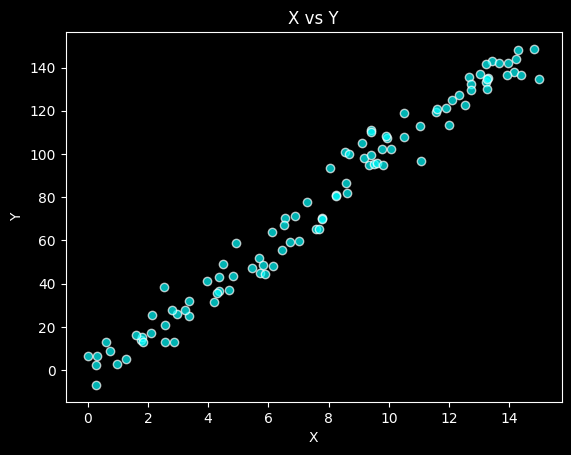

In [25]:
X = dataset[:, 0]
Y = dataset[:, 1]
plt.style.use("dark_background")
plt.scatter(X, Y, color='cyan', edgecolors='white', alpha=0.7, label="Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X vs Y")
plt.show()

Best fit created from own linear regression. Plots the
learned linear function together with the training data points.

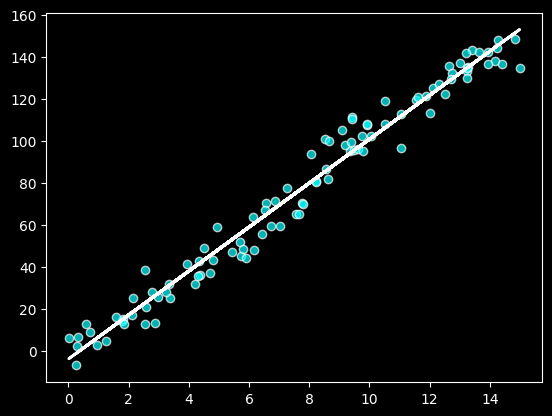

In [26]:
EX = np.mean(X)
EY = np.mean(Y)
EXY = np.mean(X*Y)
EX_2 = np.mean(X**2)
EY_2 = np.mean(Y**2)

theta_0 = (EX_2*EY-EX*EXY)/(EX_2-EX**2)
theta_1 = (EXY-EX*EY)/(EX_2-EX**2)

plt.scatter(X, Y, color='cyan', edgecolors='white', alpha=0.7, label="Data Points")
plt.plot(X, theta_0 + theta_1*X, color='white', linestyle='-', linewidth=2, label=f"Y = {theta_0} + {theta_1}X")
plt.show()

Parameters.

In [27]:
print(theta_0, theta_1)

-3.8469939446510435 10.45946871880033


Loads ‘nonlin_df.csv’. Repeat the steps in P2.
The data is generated by 𝑌 = 𝑋^2.5 + 𝜖, where 𝜖 is a random noise independent of 𝑋 and has zero mean.

𝐸[𝑌|𝑋 = 𝑥] = 𝑥^2.5

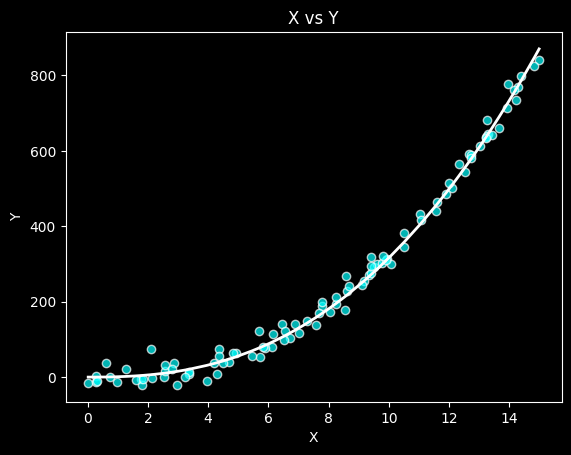

In [28]:
df = pd.read_csv("nonlin_df.csv")
dataset = df[['X', 'Y']].to_numpy()

X = dataset[:, 0]
Y = dataset[:, 1]
plt.scatter(X, Y, color='cyan', edgecolors='white', alpha=0.7, label="Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X vs Y")

X_sorted = np.sort(X)
Y_model = X_sorted ** 2.5
plt.plot(X_sorted, Y_model, color='white', linewidth=2, label=r"$y = X^{2.5}$")

plt.show()

KNN for 𝐾 = 4, 𝐾 = 8, and 𝐾 = 16.

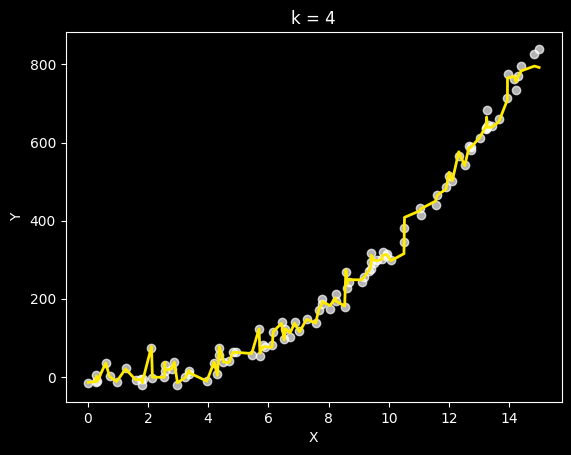

In [29]:
def sort(X, Y):
    sorted_indices = np.argsort(X)
    X_sorted = X[sorted_indices]
    Y_sorted = Y[sorted_indices]
    return X_sorted, Y_sorted


def k_nearest_neighbor(X, Y, k):
    points = np.column_stack((X, Y))
    X = Y = np.array([])
    for X_0 in points:
        distances = []
        for _ in range(k+1):
            distances.append(sys.maxsize)

        k_nearest = {}
        for point in points:
            dist = np.linalg.norm(X_0 - point)
            if dist < max(distances) and dist != 0:
                distances.remove(max(distances))
                distances.append(dist)
                k_nearest[float(dist)] = float(point[1])
                k_nearest.pop(max(distances), None)

        Y_hat = sum(k_nearest.values())/len(k_nearest)
        X = np.append(X, X_0[0])
        Y = np.append(Y, Y_hat)
    return X, Y

plt.scatter(X, Y, color='white', edgecolors='white', alpha=0.7, label="Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("k = 4")

k = 4
k_X, k_Y = k_nearest_neighbor(X, Y, k)
k_X, k_Y = sort(k_X, k_Y)
plt.plot(k_X, k_Y, color='#FFEA00', linewidth=2)

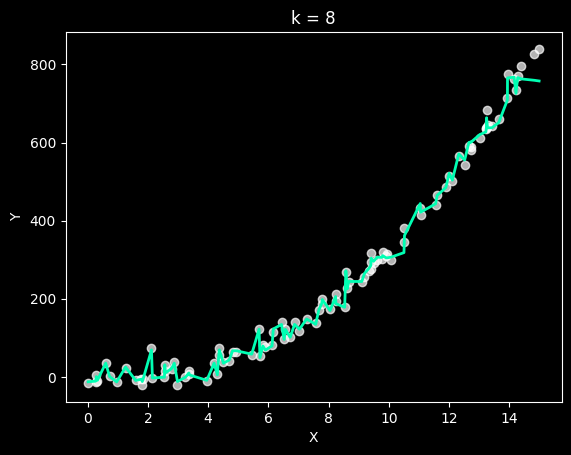

In [30]:
plt.scatter(X, Y, color='white', edgecolors='white', alpha=0.7, label="Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("k = 8")

k = 8
k_X, k_Y = k_nearest_neighbor(X, Y, k)
k_X, k_Y = sort(k_X, k_Y)
plt.plot(k_X, k_Y, color='#00FFB3', linewidth=2)

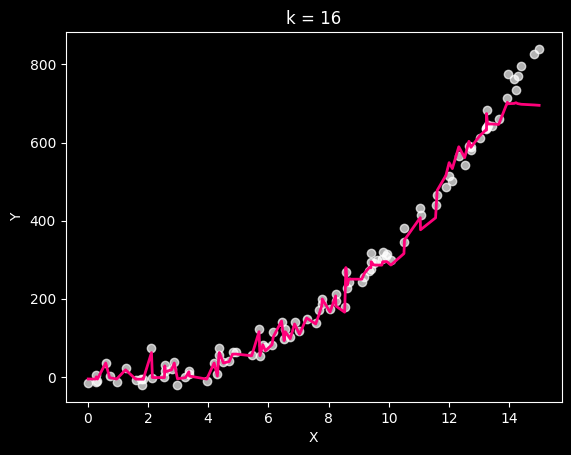

In [31]:
plt.scatter(X, Y, color='white', edgecolors='white', alpha=0.7, label="Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("k = 16")

k = 16
k_X, k_Y = k_nearest_neighbor(X, Y, k)
k_X, k_Y = sort(k_X, k_Y)
plt.plot(k_X, k_Y, color='#FF007A', linewidth=2)

Uses ‘lin_df.csv’. Derives from ℎ(𝜃0, 𝜃1), which is a quadratic function of 𝜃0 and 𝜃1. Calculates the
required coefficients using the training data. Plots the function ℎ(𝜃0, 𝜃1) in 3D. Red dot at minimum.

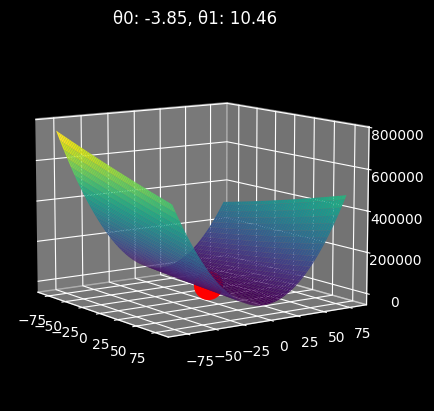

In [32]:
x = np.linspace(-80, 80, 100)
y = np.linspace(-80, 80, 100)
T0, T1 = np.meshgrid(x, y)

H = EY_2 - 2 * T0 * EY - 2 * T1 * EXY + T0 ** 2 + 2 * T0 * T1 * EX + T1 ** 2 * EX_2
H_min = EY_2 - 2 * theta_0 * EY - 2 * theta_1 * EXY + theta_0 ** 2 + 2 * theta_0 * theta_1 * EX + theta_1 ** 2 * EX_2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, H, cmap='viridis')
ax.scatter(theta_0, theta_1, H_min, color='red', s=400)
ax.view_init(elev=10, azim=-35)
plt.title(f'θ0: {round(theta_0, 2)}, θ1: {round(theta_1, 2)}')
plt.show()

Giddy up: 𝑔(𝜃0, 𝜃1) = 𝜃0^2 − 𝜃1^2 at (0,0) 

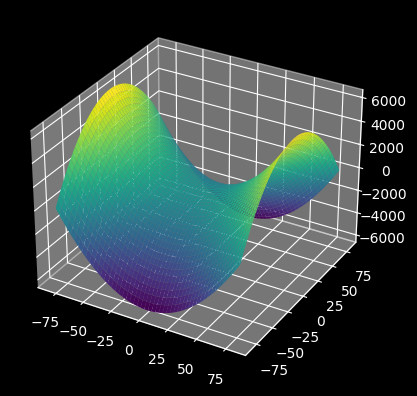

In [33]:
G = T0 ** 2 - T1 ** 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, G, cmap='viridis')
plt.show()